<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB51_D01_Discrete_Fourier_Transform_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $
$ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{\pi}{4}}} } $
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{\pi}{4}}} } $
$ \newcommand{\qgate}[1]{ \mathop{\\textit{#1} } }$

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b><font color="blue"> Solutions for </font>Discrete Fourier Transform</b></font>
<br>
<br><br>

<a name="task1"></a>
### Task 1 (on paper)

Given $x=\myvector{1 \\ 2}$, apply $DFT$ to obtain $y$.

<h3>Solution </h3>

In this example $N=2$, $x_0=1$ and $x_1=2$. Hence, we have

$$y_k=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}e^{\frac{2\pi i j k}{2}}x_j.$$

Replacing $k=0$,

$$
y_0=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}e^{\frac{2\pi ij\cdot 0}{2} }x_j= \frac{1}{\sqrt{2}}  (x_0+x_1) = \frac{3}{\sqrt{2}}
$$

and $k=1$,

$$
y_1=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}e^{\frac{2\pi ij\cdot 1}{2}}x_j= \frac{1}{\sqrt{2}} \biggl( e^{\frac{2\pi i \cdot0 \cdot1}{2}} x_0 +  e^{\frac{2\pi i \cdot 1 \cdot 1}{2}} x_1 \biggr)  = \frac{1+  2e^{\pi i}}{\sqrt{2}}=\frac{-1}{\sqrt{2}}.
$$



We can conclude that $y=\myvector{\frac{3}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} }  $.

<a name="task2"></a>
### Task 2

Create the following list in Python (1 0 0 0 0 1 0 0 0 0 1 0 0 0 0) where every 5'th value is a 1.

Then compute its $DFT$ using python and visualize.

<h3>Solution </h3>

In [1]:
#Create an empty list
x=[]
#Number of elements in the list
N=100
#We set every fifth number as a 1
for i in range(N):
    if i%5==0:
        x.append(1)
    else:
        x.append(0)

In [2]:
from cmath import exp
from math import pi
from math import sqrt

#We calculate Fourier Transform of the list
y=[]
for k in range(N):
    s=0
    for j in range(N):
        s+= exp(2*pi*1j*j*k/N)*x[j]
    s*=1/sqrt(N)
    y.append(s)

In [3]:
y

[(2+0j),
 (-6.66133814775094e-17+6.106226635438361e-17j),
 (1.1102230246251566e-17+0j),
 (2.886579864025407e-16-6.66133814775094e-17j),
 (9.992007221626409e-17+1.9984014443252818e-16j),
 (2.1672546146854842e-16+2.664535259100376e-16j),
 (-8.271161533457416e-16+3.3306690738754696e-16j),
 (2.220446049250313e-16+4.1078251911130794e-16j),
 (-1.5543122344752193e-16+9.992007221626409e-17j),
 (1.2212453270876722e-15+2.0539125955565397e-16j),
 3.0010036385476035e-16j,
 (-9.992007221626409e-17+6.494804694057166e-16j),
 (-9.2148511043888e-16-1.7763568394002506e-16j),
 (5.88418203051333e-16-3.4416913763379854e-16j),
 (2.3259172365897033e-15-3.9968028886505636e-16j),
 (8.819313895770708e-16-8.881784197001252e-16j),
 (-3.3861802251067277e-16+7.660538869913581e-16j),
 (-1.4765966227514583e-15-1.0436096431476472e-15j),
 (-7.216449660063518e-16+1.2101430968414207e-15j),
 (2.1871393585115587e-15+3.3306690738754696e-16j),
 (2-6.430014676160192e-15j),
 (5.440092820663267e-16+3.0531133177191805e-15j),
 (2

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


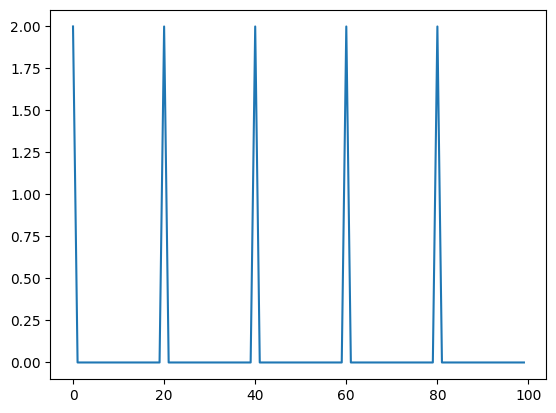

In [4]:
import matplotlib.pyplot as plt
#Visualizing the trasformed list
plt.plot(y)
plt.show()

<a name="task3"></a>
### Task 3

Repeat Task 2 where this time every 6'th value is a 1 and the rest is 0.

<h3>Solution </h3>

In [5]:
#Create an empty list
x=[]
#Number of elements in the list
N=100
#We set every sixth number as a 1
for i in range(N):
    if i%6==0:
        x.append(1)
    else:
        x.append(0)

In [6]:
from cmath import exp
from math import pi
from math import sqrt

#We calculate Fourier Transform of the list
y=[]
for k in range(N):
    s=0
    for j in range(N):
        s+= exp(2*pi*1j*j*k/N)*x[j]
    s*=1/sqrt(N)
    y.append(s)

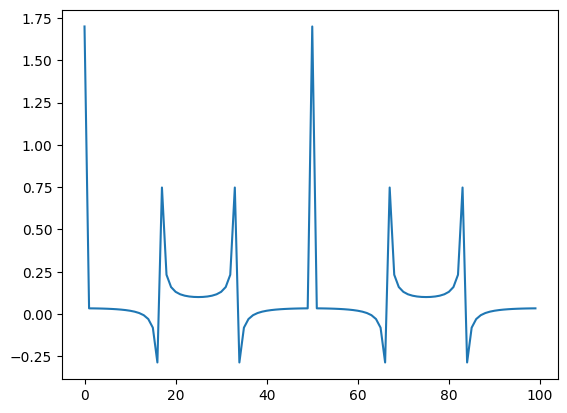

In [7]:
import matplotlib.pyplot as plt
#Visualizing the trasformed list
plt.plot(y)
plt.show()